Link for Dashboard Visualization using Tableau : <br>
https://public.tableau.com/app/profile/yudis.aditya/viz/DashboardDQLabSalesPerformance/Dashboard_Visualization_Performance_Year?publish=yes

============================= <br><br>
Milestone 1 <br><br>

Nama  : I Nyoman Aditya Yudiswara <br>
Batch : FTDS-006 <br>

This noteboook is used for : 
1. Business Understanding 
2. Data Exploration 
3. Data Cleaning 
4. Analysis Statistic 
5. Conclusion 

This 5 point above will use data from sales_performance.csv

==============================


<h1>1. Identification Problem </h1>
<h3>1.1 Background</h3>
<p>
Me as Data Analyst have a task from DQLab to make analyze data to increase sales and decrase order status that not completed. Also i need to make dashboard to visualize my analyze so my client can more easy to understand my insight
</p>
<h3>1.2 Problem Statement</h3>
<p>
With using SMART Framework i make problem statement like this : <br>
"The goal is to increase sales for 10 % and decrase order that not finished for 5% from previous year within the next year. To achieve that me as data analyst have to find out many factor that has possibility to increase sales and decrase order that not finished."<br><br>
To ease my analysis and solve the problem, i will use method 5W + 1 H to make my problem become modular like this : <br>
- How many order qty that suitable for each product category for promotion ? <br> 
- How are order status performance for each year ? <br> 
- How are product category performance for each year ? <br> 
- Who are the top 5 customer ?  <br>  
- How performance sales and order qty for each year ? <br> 
- How impact discount with sales and order status ? <br> <br>

From my problem statement, the metrics i used is sales and order_status <br><br>

</p>

In [2]:
# import package that need for this notebook 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import seaborn as sns

<h1>2. Data Loading</h1>

<h3>2.1 Load data from csv kaggle</h3>

In [3]:
# load file sales_performance.csv to datagrame df 
# Reference = https://www.kaggle.com/datasets/dhawyfarrasputra/sales-performance-report-dqlab-store
# I am using kaggle so i dont put my sql in here.
# But if my teacher insist, it is my sql : 
'''
SELECT * 
FROM sales_performance
'''
df = pd.read_csv('sales_performance.csv')

<h3>2.2 Data Exploration</h3>

In [4]:
# get 5 data from above df
df['customer'].nunique()

777

In [4]:
# get information about every coulm name, missing value, data type, and total row 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5499 non-null   int64  
 1   order_status          5499 non-null   object 
 2   customer              5499 non-null   object 
 3   order_date            5499 non-null   object 
 4   order_quantity        5499 non-null   int64  
 5   sales                 5499 non-null   int64  
 6   discount              5499 non-null   float64
 7   discount_value        5499 non-null   int64  
 8   product_category      5499 non-null   object 
 9   product_sub_category  5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB


In above code we can get information about column in sales performance data, there are: 
- order_id = unique order number 
- order_status = status of the order, whether is finished or returned 
- customer = customer name 
- order_date = date of the order 
- order_quantity = the quantity on a particular order 
- sales = sales generated on a particular order, the value is in IDR(Indonesia Rupiah) currency 
- discount = a discount percentage 
- discount_value = a sales multiply by discount, the value is in IDR(Indonesia Rupiah) durrency 
- product_category = a category of the product 
- product_sub_category = a subcategory from product category 

In these column i can see that all column has a right data type except "order_date" that should be data type date. Our data doesn't have missing value. And we have row total data 5499


In [5]:
# This cell is used to know if there is any duplicate data row only based column "order_id"
df[df['order_id'].duplicated()]

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
186,29795,Order Cancelled,Grant Carroll,2011-11-25,49,38650400,0.05,1932520,Office Supplies,Binders & Binder Accessories
201,31781,Order Cancelled,Sylvia Foulston,2009-01-16,46,498040,0.10,49804,Office Supplies,Binders & Binder Accessories
5453,40519,Order Finished,Sandra Glassco,2010-12-21,38,165860,0.08,13269,Office Supplies,Rubber Bands


From exploration in column order_id we can see that there are 3 order_id that duplicated. From its definition, it should not be duplicated. There are two assumption that i predict so this event can be happened : 
- Because there are bug when do input order 
- We can edit / re active  order that has already been canceled. Because in order_id 29795 and 31781 the difference is just order_status. But it still wrong because it can create new order_id<br>

With this 2 assumption, i decide to not delete its duplicated because its just so little row that duplicated based on order_id

In [6]:
# This cell is used to know value unique in column "order_status"
df['order_status'].unique()

array(['Order Finished', 'Order Returned', 'Order Cancelled'],
      dtype=object)

In column order_status there are only 3 options : 
- Order Finished 
- Order Returned 
- Order Cancelled

In [7]:
# This cell is used to know number unique value in column 'customer'
df['customer'].nunique()

777

In column customer we can see that we have 777 unique name customer. 

In [8]:
# This cell is used to know description statistik in column order_date
pd.to_datetime(df['order_date']).describe()

count                             5499
mean     2010-12-28 09:05:59.410801920
min                2009-01-01 00:00:00
25%                2009-12-24 12:00:00
50%                2010-12-21 00:00:00
75%                2012-01-05 00:00:00
max                2012-12-30 00:00:00
Name: order_date, dtype: object

In column "order_date" we can see that the range in our date between "2009-01-01" until "2012-12-30"

In [9]:
# This cell is used to get information in column "order_quantity" that related with distribution data
min_qty = df['order_quantity'].min()
max_qty = df['order_quantity'].max()
range_qty = max_qty - min_qty
mean = df['order_quantity'].mean()
median = df['order_quantity'].median()
modus = df['order_quantity'].mode()
skewness = df['order_quantity'].skew()
kurtosis = df['order_quantity'].kurtosis()

analisa_deskriptif_order_quantity = {
    'min':min_qty,
    'max':max_qty,
    'range':range_qty,
    'mean':mean,
    'median':median,
    'modus':modus,
    'skewness':skewness,
    'kurtosis':kurtosis
}
analisa_deskriptif_order_quantity

{'min': 1,
 'max': 50,
 'range': 49,
 'mean': 25.5215493726132,
 'median': 26.0,
 'modus': 0    4
 Name: order_quantity, dtype: int64,
 'skewness': -0.024156568068862228,
 'kurtosis': -1.207952531596984}

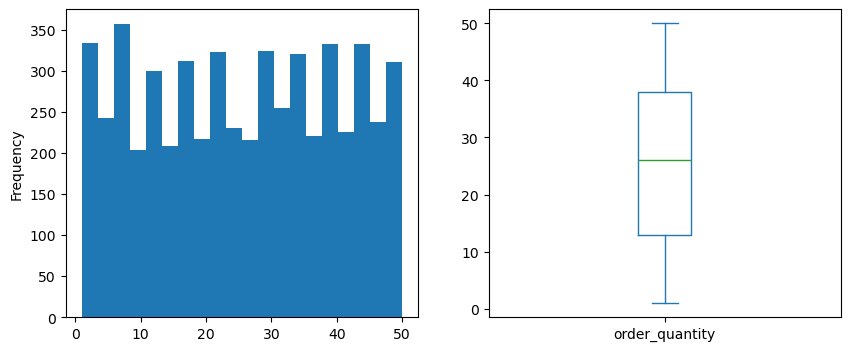

In [10]:
# This cell is used for show plot histogram and box in column "order_quantity"
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['order_quantity'].plot(kind="hist",bins=20,ax=ax[0])
df['order_quantity'].plot(kind="box",ax=ax[1])
plt.show()

From analysis in column "order_quantity" we can see that value mean and median is not far significant, and has skewness -0.02 which is very close to 0 that indicate that distribution data in "order_quantity" is normal.

In [11]:
# This cell is used to get information in column "sales" that related with distribution data
min_qty = df['sales'].min()
max_qty = df['sales'].max()
range_qty = max_qty - min_qty
mean = df['sales'].mean()
median = df['sales'].median()
modus = df['sales'].mode()
skewness = df['sales'].skew()
kurtosis = df['sales'].kurtosis()

analisa_deskriptif_sales = {
    'min':min_qty,
    'max':max_qty,
    'range':range_qty,
    'mean':mean,
    'median':median,
    'modus':modus,
    'skewness':skewness,
    'kurtosis':kurtosis
}
analisa_deskriptif_sales

{'min': 6460,
 'max': 178122100,
 'range': 178115640,
 'mean': 3532837.7434078925,
 'median': 854640.0,
 'modus': 0     38720
 1     86580
 2    449160
 Name: sales, dtype: int64,
 'skewness': 5.8228394962076395,
 'kurtosis': 74.73887915225505}

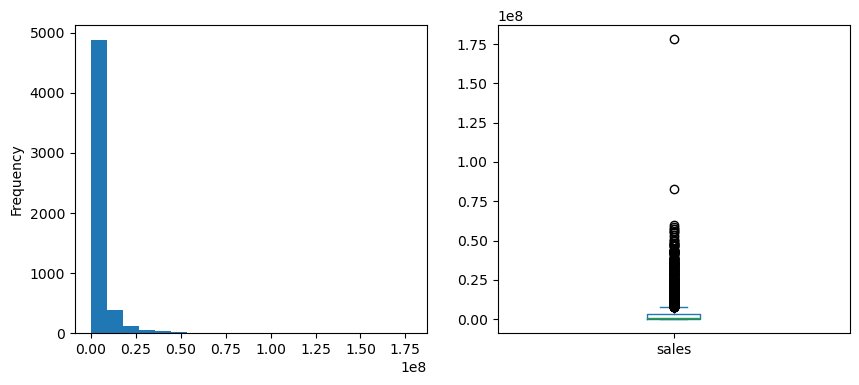

In [12]:
# This cell is used for show plot histogram and box in column "sales"
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['sales'].plot(kind="hist",bins=20,ax=ax[0])
df['sales'].plot(kind="box",ax=ax[1])
plt.show()

Based on analysis column 'sales' we can see that value mean and median has far significant range. And it's skewness has value 5.8 that indicate distribute data 'sales' will be more to the left and kurtosis has value 74.7 which is very extreme value. Based on that condition, we can make conclusion that column 'sales' distribution data is skew and very extreme so we need to remove outlier with method extreme skew on process data cleaning

In [13]:
# This cell is used to get information in column "discount" that related with distribution data
min_qty = df['discount'].min()
max_qty = df['discount'].max()
range_qty = max_qty - min_qty
mean = df['discount'].mean()
median = df['discount'].median()
modus = df['discount'].mode()
skewness = df['discount'].skew()
kurtosis = df['discount'].kurtosis()

analisa_deskriptif_discount = {
    'min':min_qty,
    'max':max_qty,
    'range':range_qty,
    'mean':mean,
    'median':median,
    'modus':modus,
    'skewness':skewness,
    'kurtosis':kurtosis
}
analisa_deskriptif_discount

{'min': 0.0,
 'max': 0.17,
 'range': 0.17,
 'mean': 0.049914529914529916,
 'median': 0.05,
 'modus': 0    0.05
 1    0.08
 Name: discount, dtype: float64,
 'skewness': 0.02099734590065443,
 'kurtosis': -1.1772217425622222}

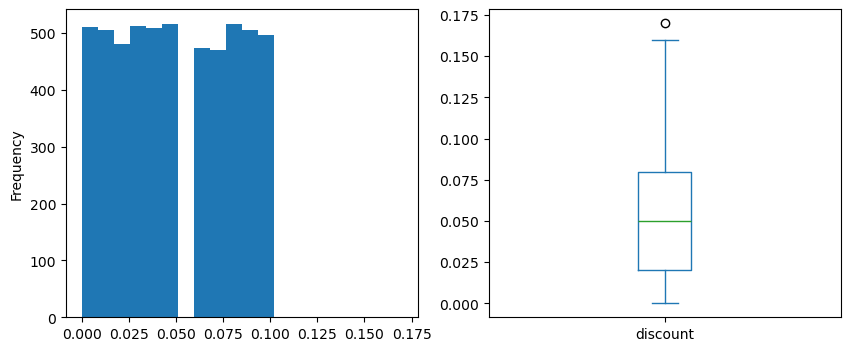

In [14]:
# This cell is used for show plot histogram and box in column "discount"
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['discount'].plot(kind="hist",bins=20,ax=ax[0])
df['discount'].plot(kind="box",ax=ax[1])
plt.show()

From analysis column 'discount' we can see that value skew is so close to value 0. Mean and median also has less range between them. That indicate that distribution data 'discount' is normal.

In [15]:
# This cell is used to get information in column "discount_value" that related with distribution data
min_qty = df['discount_value'].min()
max_qty = df['discount_value'].max()
range_qty = max_qty - min_qty
mean = df['discount_value'].mean()
median = df['discount_value'].median()
modus = df['discount_value'].mode()
skewness = df['discount_value'].skew()
kurtosis = df['discount_value'].kurtosis()

analisa_deskriptif_discount_value = {
    'min':min_qty,
    'max':max_qty,
    'range':range_qty,
    'mean':mean,
    'median':median,
    'modus':modus,
    'skewness':skewness,
    'kurtosis':kurtosis
}
analisa_deskriptif_discount_value

{'min': 0,
 'max': 7441778,
 'range': 7441778,
 'mean': 173504.77086743043,
 'median': 31917.0,
 'modus': 0    0
 Name: discount_value, dtype: int64,
 'skewness': 5.528640090827947,
 'kurtosis': 45.53570294885145}

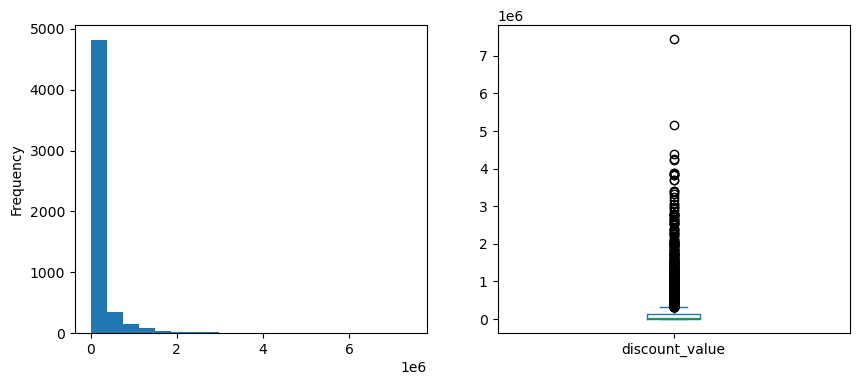

In [16]:
# This cell is used for show plot histogram and box in column "discount_value"
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['discount_value'].plot(kind="hist",bins=20,ax=ax[0])
df['discount_value'].plot(kind="box",ax=ax[1])
plt.show()

From analysis column "discount_value" we can see that it has same condition like column "sales". So it also skew. That make sense because "discount_value" is get from sales * discount. So in process data cleaning we can drop this column because this column can be replace with other column

In [17]:
# This cell is used to know unique value in column "product_category"
df['product_category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

From column "product_category" we can see that there are only 3 product category for entire data. There are:
- Office Supplies 
- Technology 
- Furniture

In [18]:
# This cell is used to know unique value in column "product_sub_category"
df[['product_category','product_sub_category']].sort_values('product_category').drop_duplicates()

,product_category,product_sub_category
2749,Furniture,Bookcases
2423,Furniture,Tables
2422,Furniture,Office Furnishings
2412,Furniture,Chairs & Chairmats
3775,Office Supplies,Appliances
3776,Office Supplies,Binders & Binder Accessories
3779,Office Supplies,Storage & Organization
3784,Office Supplies,Labels
3786,Office Supplies,Pens & Art Supplies
3800,Office Supplies,Rubber Bands


From column "product_sub_category" we can see that: 
- product_category "Furniture" has 4 product_sub_category 
- product_category "Office Supplies" has 9 product_sub_category 
- product_category "Technology" has 4 product_sub_category 

In [19]:
# Check duplicated row based on all column
df.duplicated().sum()

0

From code above we can see that our data has no duplicate data based on all column

<h1>3. Data Cleaning<h1>

In [20]:
# This code is used as savepoint df before doing data cleaning. If there something wrong when do data cleaning 
# i can use thiss cell to back after data exploration
df_clean = pd.DataFrame(df)

<h3>3.1 Make sure all column has a right data type </h3>
<p>
Based on data exploration we can see that there is column that has no right data type based on it's functionality, which is "order_date". Right now we want to make sure all column has a right data type
</p>

In [21]:
#This cell is used to convert column 'order_date' data type from Object to Date
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5499 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   discount_value        5499 non-null   int64         
 8   product_category      5499 non-null   object        
 9   product_sub_category  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 429.7+ KB


From process above right now we have column order_date from Object to datetime. And right now all column in our data has right data type based on their funcionallity

<h3>3.2 Remove column that unnecessary </h3>
<p>
From Data Exploration we can see that discount_value can get from sales*discount_value. From my point of view, This column can be removed because this column can be replace with other column. And also it has same pattern distribution data with column "sales"
</p>

In [23]:
# drop column discount_value from df_clean
df_clean = df_clean.drop('discount_value',axis=1)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5499 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   product_category      5499 non-null   object        
 8   product_sub_category  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 386.8+ KB


From information above we can see that column "discount_value" has been deleted from df_clean

<h3>3.3 Make sure our data has no outlier</h3>
<p>
From data exploration we can see that column "sales" has distribution data skew. We have to clean that to make sure our next analysis statistic has better insight. 
</p>

In [25]:
# Find value q1, q3 , and iqr from df_clean
q1 = df_clean['sales'].quantile(0.25)
q3 = df_clean['sales'].quantile(0.75)
iqr = q3 - q1 

# find lower and upper bound for remove outlier from df_clean
lower_bound = q1 - 3*iqr 
upper_bound = q3 + 3*iqr

# do filter so df_clean only has data without outlier from sales
df_clean = df_clean[(df_clean['sales'] >= lower_bound) & (df_clean['sales'] <= upper_bound)]


In [26]:
# This cell is used to get information in column "sales" that related with distribution data
min_qty = df_clean['sales'].min()
max_qty = df_clean['sales'].max()
range_qty = max_qty - min_qty
mean = df_clean['sales'].mean()
median = df_clean['sales'].median()
modus = df_clean['sales'].mode()
skewness = df_clean['sales'].skew()
kurtosis = df_clean['sales'].kurtosis()

analisa_deskriptif_sales = {
    'min':min_qty,
    'max':max_qty,
    'range':range_qty,
    'mean':mean,
    'median':median,
    'modus':modus,
    'skewness':skewness,
    'kurtosis':kurtosis
}
analisa_deskriptif_sales

{'min': 6460,
 'max': 12340040,
 'range': 12333580,
 'mean': 1908458.2620635543,
 'median': 690940.0,
 'modus': 0     38720
 1     86580
 2    449160
 Name: sales, dtype: int64,
 'skewness': 2.007160683718335,
 'kurtosis': 3.526331046708521}

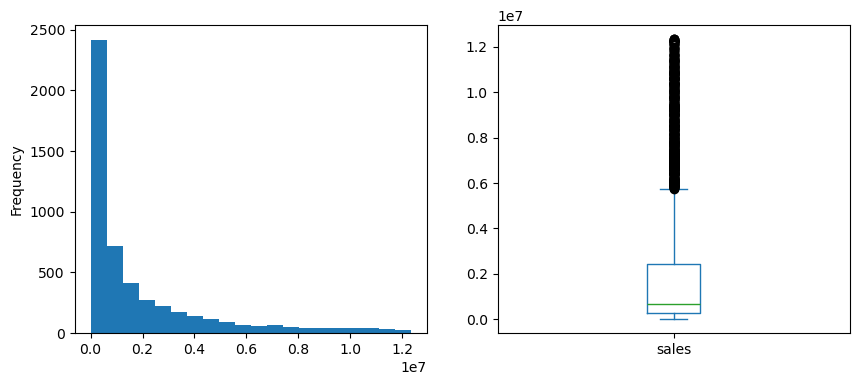

In [27]:
# This cell is used for show plot histogram and box in column "sales"
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df_clean['sales'].plot(kind="hist",bins=20,ax=ax[0])
df_clean['sales'].plot(kind="box",ax=ax[1])
plt.show()

From above process we can see that right now column "sales" has less skew before and after remove outlier. Before remove outlier, skewness value in column "sales" is 5.82. After remove outlier it become 2.007. For removing outlier , i use extreme skew method because it's skew has value more than 3. 

In [28]:
df_clean.to_csv("sales_performance_clean",index=False)

<h1>4. Analysis and Calculation</h1>

<h3>4.1 Visualisation </h3>
<p>
From here i will try to visualization about every sub problem that i create in problem statement
</p>

In [29]:
# This code is used as savepoint df before doing data visualization. If there something wrong when do data cleaning 
# i can use thiss cell to back after data cleaning
df_visualization = pd.DataFrame(df_clean)

In [30]:
# make column year based on order_date
df_visualization['year'] = df_visualization['order_date'].dt.year

<h5>4.1.1 How performance sales and order qty for each year ?</h5>

In [31]:
# creating new dataframe called df_visualization_sales that used to visualize data no 4.1.1
df_visualization_sales =  df_visualization.groupby('year')[['sales','order_quantity']].sum()
df_visualization_sales

,sales,order_quantity
year,,
2009,2548924572,31785
2010,2362173423,31668
2011,2212752131,30240
2012,2605470094,32642


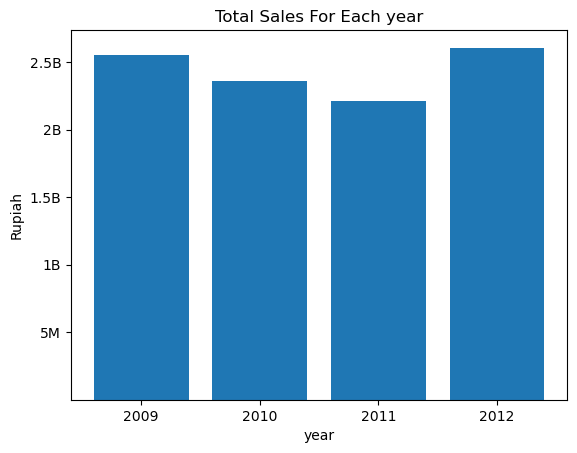

In [32]:
# This cell is used to visualize df_visualization_sales column sales in bar 

# get list_year as x_axis
list_year = df_visualization_sales.index.to_list()

# to convert rupiah to format Million and Billion
yticks = [500000000,1000000000,1500000000,2000000000,2500000000]
yticks_label = ['5M','1B','1.5B','2B','2.5B']

# create plot bar based on df_visualization_sales sales
plt.bar(list_year,df_visualization_sales['sales'], label="sales")

# plt additional settings
plt.xticks(list_year)
plt.xlabel('year')
plt.ylabel('Rupiah')
plt.title("Total Sales For Each year")
plt.yticks(yticks,yticks_label)

plt.show()

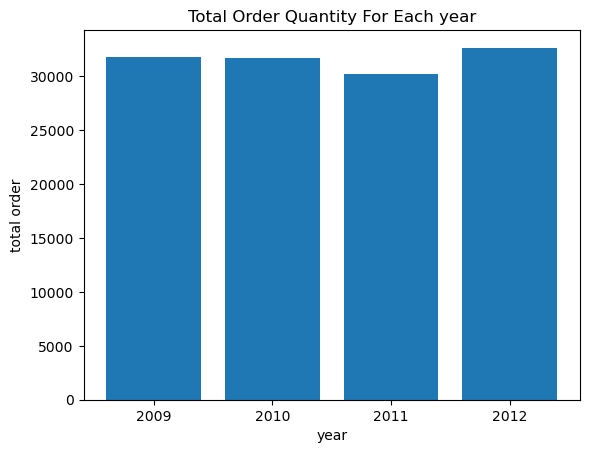

In [33]:
# This cell is used to visualize df_visualization_sales column order_quantity in bar 

# get list_year as x_axis
list_year = df_visualization_sales.index.to_list()

# create plot bar based on  df_visualization_sales order_quantity
plt.bar(list_year,df_visualization_sales['order_quantity'], label="sales")

# additional seting plot
plt.xticks(list_year)
plt.xlabel('year')
plt.ylabel('total order')
plt.title("Total Order Quantity For Each year")
plt.show()

In [34]:
df_visualization_sales.describe()

,sales,order_quantity
count,4.000000e+00,4.000000
mean,2.432330e+09,31583.750000
std,1.795440e+08,995.516072
min,2.212752e+09,30240.000000
25%,2.324818e+09,31311.000000
50%,2.455549e+09,31726.500000
75%,2.563061e+09,31999.250000
max,2.605470e+09,32642.000000


From this visualization we can see that sales has correlation with order_quantity. It prove by from year 2009 until 2011 both sales and order_quantity has drop pattern. And in year 2012 both sales and order_quantity is increased. And then we can get summary information that : 
- year that have the lowest sales and order_quantity is 2011 
- year that has the highest sales and order_quantity is 2012 
- mean sales from 2009 - 2012 is 2.4 billion and order quantity is 31583

<h5>4.1.2 Who are the top 5 customer ?</h5>

In [35]:
# Create new dataframe to visualize data for question 4.1.2
df_visualization_top5_customer = df_visualization.groupby('customer')[['sales']].sum().sort_values('sales',ascending=False).iloc[:5]
df_visualization_top5_customer

,sales
customer,
Sonia Sunley,55959218
Brad Thomas,53626929
Tanja Norvell,49622532
Sally Knutson,46442340
Jim Epp,46434887


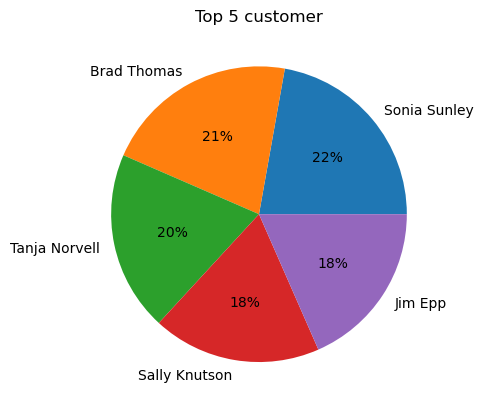

In [36]:
# get list name that used for label in pie chart
list_name = df_visualization_top5_customer.index.to_list()

# show plot pie based on df_visualization_top5_customer sales
plt.pie(df_visualization_top5_customer['sales'], labels=list_name, autopct='%1.0f%%')
plt.title("Top 5 customer")
plt.show()

From this chart we can see that this our top 5 customer

<h5>4.1.3 How are product performance for each year ?</h5>

In [37]:
# create new dataframe that used for visualize data for question 4.1.3
df_visualization_product_category =  df_visualization.groupby(['year','product_category'])[['sales']].sum()
df_visualization_product_category

sales
year product_category           
2009 Furniture         863327364
     Office Supplies   797848560
     Technology        887748648
2010 Furniture         873770848
     Office Supplies   711968920
     Technology        776433655
2011 Furniture         791842964
     Office Supplies   735938240
     Technology        684970927
2012 Furniture         802541248
     Office Supplies   871535680
     Technology        931393166

In [38]:
# This cell us used for get list value that will used for value in seaborn lineplot
list_furniture = []
list_other = []
list_tech = [] 
for year in range(2009,2013,1):
    list_furniture.append(df_visualization_product_category.loc[[(year,'Furniture')]]['sales'].iloc[0])
    list_other.append(df_visualization_product_category.loc[[(year,'Office Supplies')]]['sales'].iloc[0])
    list_tech.append(df_visualization_product_category.loc[[(year,'Technology')]]['sales'].iloc[0])

list_value = np.array(list_furniture + list_other + list_tech)
list_value


array([863327364, 873770848, 791842964, 802541248, 797848560, 711968920,
       735938240, 871535680, 887748648, 776433655, 684970927, 931393166])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


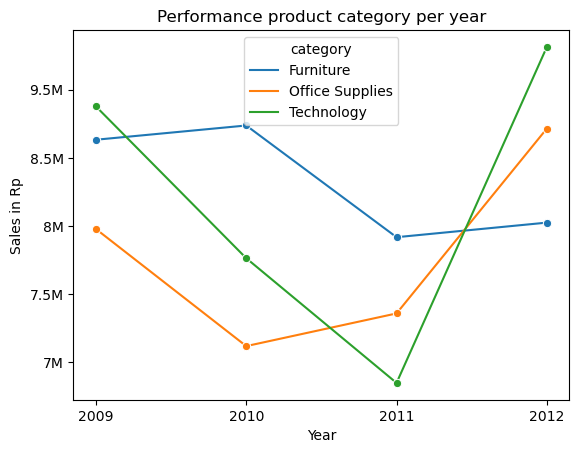

In [39]:
np.random.seed(0)

# It is setting for creating sns.linplot
data = {
    'time': np.tile(np.arange(4), 3),
    'value': list_value,
    'category': np.repeat(['Furniture', 'Office Supplies', 'Technology'], 4)
}
df = pd.DataFrame(data)

# Create the line plot
sns.lineplot(data=df, x='time', y='value', hue='category', marker='o')

# Add additional setting in lineplot
plt.xlabel('Year')
plt.ylabel('Sales in Rp')
plt.xticks([0,1,2,3],['2009','2010','2011','2012'])
plt.yticks([700000000,750000000,800000000,850000000,900000000],['7M','7.5M','8M','8.5M','9.5M'])
plt.title('Performance product category per year')

# Show the plot
plt.show()

From Graph above we can get insight per category : 
- Category Furniture has lower progress from 2009 until 2012 
- Category Office Supoplies has lower progress from year between 2009 and 2010. but has significant good progress in year between 2010 and 2012
- Category Technology has significant bad progress in year between 2009 and 2011, but has significant good progress in year between 2011 and 2012

<h5>4.1.4 How are order status performance for each year ?</h5>

In [40]:
# This cell is used for create new dataframe to visualize data order status that failed for each year
df_visualization["order_status_failed"] = df_visualization["order_status"].replace({"Order Cancelled":"Order Cancelled and Returned","Order Returned":"Order Cancelled and Returned"})
df_visualization_order_status =  df_visualization[df_visualization['order_status_failed'] != "Order Finished" ].groupby(['year']).size()
df_visualization_order_status

year
2009    137
2010    137
2011    131
2012    124
dtype: int64

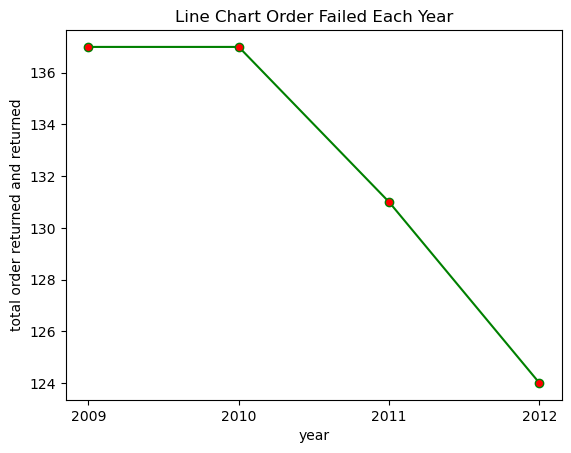

In [41]:
# It is used for x axis in line chart
year_x = df_visualization_order_status.index.to_list()

# It is used for y axis in line chart
qty_failed_y = df_visualization_order_status.to_list()

# create line chart for performance order status
fig, ax = plt.subplots()

ax.plot(year_x,qty_failed_y,color="green",marker="o",markerfacecolor="red")
x_ticks = range(min(year_x),max(year_x) + 1)
ax.set_xticks(x_ticks)
ax.set_xlabel('year')
ax.set_ylabel('total order returned and returned')
ax.set_title("Line Chart Order Failed Each Year")
# plt.plot(year_x,qty_failed_y)
plt.show()


From above graph line chart we can see that from year 2009 until 2012 has decrasing progress for order status that failed.

<h3>4.2 Statistk Analysist</h3>

In [42]:
# This code is used as savepoint df before doing data visualization. If there something wrong when do statistik analyst 
# i can use thiss cell to back after data cleaning
df_analyst = pd.DataFrame(df_clean)

<h5>4.2.1 Analyst Descriptive</h5>
<p>
In this section i want to do analyst descriptive to answer question "How many order qty that suitable for each product category for promotion ?". 
</p>

In [43]:
# This cell is used to get mean,min,max,mode order_quantity per product_category
def mode(series):
    return series.mode().iloc[0]

df_analyst.groupby('product_category').agg({'order_quantity':['mean','min','max',mode]})

order_quantity             
                           mean min max mode
product_category                            
Furniture             23.774226   1  50    4
Office Supplies       25.226199   1  50   23
Technology            24.508370   1  50   31

From information above we can see mean,min,max, and mode for every product category. 

<h5>4.2.2 Analyst Inferensial</h5>
<p>
In this section i want to do analyst inferensial to answer question "How impact discount with sales and order status ?"
</p>

In [44]:
from scipy.stats import pearsonr
'''
This cell is used to hipotesis testing pearson Test to check correlation 
between discount and sales
''' 
correlation_coefficient, p_value = pearsonr(df_analyst['sales'], df_analyst['discount'])
print("P-value:",p_value)
print("correlation_coefficient:",correlation_coefficient)

P-value: 0.8883462568268771
correlation_coefficient: -0.001966818491081043


Because <b>sales</b> and <b>discount</b> is numerical and column sales has not normal distribution data So i am using method pearson to check correlation between discount and sales, The hipotesa i make should be like this : <br>
H0 : There is no relationship between 'discount' and 'sales' <br>
H1 : There is relationship between 'discount' and 'sales' <br>

Because p-value > critical_value ( 0.8 > 0.05) then H0 is failed to rejected. Which mean There is no significant relationship between discount and sales. 

In [45]:
'''
This cell is used to hipotesis testing Anova Test to check correlation 
between discount and order_status
''' 
df_analyst['order_status'].unique()
order_finished = df_analyst[df_analyst['order_status'] == 'Order Finished']['discount']
order_returned = df_analyst[df_analyst['order_status'] == 'Order Returned']['discount']
order_cancel = df_analyst[df_analyst['order_status'] == 'Order Cancelled']['discount']
# contingency_table = pd.crosstab(df_analyst['discount'],df_analyst['order_status'])
res = stats.f_oneway(order_finished,order_returned,order_cancel)
print("P-value:",res.pvalue)

P-value: 0.007886331938454174


Because i want to hipotesis testing correlaction between discount(numerical) and order_status(categorial) I am using method anova for check correlation between discount and order status. The hipotesis i make should be like this : <br>
H0 : There is no relationship between 'discount' and 'order_status' <br>
H1 : There is relationship between 'discount' and 'order_status'<br><br>

Because p-value < critical_value ( 0.007 < 0.5) then H0 is rejected. Which mean There is relationship between discount and order status

<h1>5. Conclusion</h1>

<p>
    After i do analyze about data, There are many insight that we can get: 
    <ol>
        <li>
        Most people will buy product <b>category</b> for one transaction order with 4 quantity, <b>Office Supplies</b> with 23 quantity, and <b>Technology</b> with 31 quantity.<br> Because column "order_quantity" has normal distribution we can also look their means like <b>category</b> with 24 quantity, <b>Office Supplies</b> with 25 quantity, and <b>Technology</b> with 24 quantity  
        </li>
        <li>
            Each year we can see that order status who failed because returned or canceled has little up from 2009 to 2010. But in year 2010 - 2012 orde_status who failed has significant decrased from 131 to 124
        </li>
        <li>
            From our visualization data we can our 5 top customer that has almost same distribution for sales from 2009 - 2012. There are Sonia Sunley(22%), Brad Thomas(21%), Tanja Norvell (20%), Sally Knutson (18%), and Jim Epp (18%)
        </li>
        <li>
            Each year we can see sales and order quantity has a same pattern. From 2009-2011 Sales has decrased performance from Rp 2.548.924.572 to Rp 2.212.752.131 and order quantity from 31.785 to 30.240 . But From 2011 - 2012 it has significant improve sales that more than year 2009 from Rp 2.212.752.131 to Rp 2.605.470.094 and order quantity from 30.240 to 32.642
        </li>
        <li>
            From Graph product category performance per year, we can get insight per category : <br>
            - Category Furniture has lower progress from 2009 until 2012  <br>
            - Category Office Supoplies has lower progress from year between 2009 and 2010. but has significant good progress in year between 2010 and 2012 <br>
            - Category Technology has significant bad progress in year between 2009 and 2011, but has significant good progress in year between 2011 and 2012 <br>
        </li>
        <li>
            From our analysis inferential we can see that discount doesn't have correlation with sales and discount has correlation with order_status
        </li>
    </ol> 
    <p>
        From these insight, i can recommend some action to incrase sales and decrase order status that failed. There are:<br>
        <ol>
            <li>We can do promo by specific amount quantity for one transaction. Fo example we can do promo discount for everyone who buy product with category "Office Supplies" by minimum quantity 23. </li>
            <li>We can give special price to our top customer, so it can increase order_quantity and also sales. It also good to keep customer loyalty and make sensation of competition with other customer</li>
            <li>We can see that discount doesnt really matter with sales, so we can downgrade for discount to make discount value smaller and increase sales. And discount has correlation with order_status and after i check briefly when the higher discount , the more order is failed. So we can downgrade discount for that reason.
        </ol>
    </p>
</p>